# Car Price Prediction Project with AI, ML, and TensorFLow

Datasource: https://www.kaggle.com/datasets/cooperunion/cardataset

### Machine Learning for Regression

In [862]:
import pandas as pd
import numpy as np

In [863]:
df = pd.read_csv('data.csv', index_col=False)

In [864]:
df.head(1)

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135

In [865]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [866]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

Spacing Issue

### Data Cleaning

Note: Column naming issues: Driven_Wheels, spaces, lower/uppercase

In [867]:
df['Transmission Type']

0           MANUAL
1           MANUAL
2           MANUAL
3           MANUAL
4           MANUAL
           ...    
11909    AUTOMATIC
11910    AUTOMATIC
11911    AUTOMATIC
11912    AUTOMATIC
11913    AUTOMATIC
Name: Transmission Type, Length: 11914, dtype: object

In [955]:
df.Transmission Type

SyntaxError: invalid syntax (2384802771.py, line 1)

In [869]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [870]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [871]:
df.head()

make       model  year             engine_fuel_type  engine_hp  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

Values are caps, lower cases, and space issue

In [872]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [873]:
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [874]:
df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [875]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [876]:
# df['make'].str.lower().str.replace(' ', '_')

In [877]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [878]:
df.head()

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
1  bmw    1_series  2011  premium_unleaded_(required)      300.0   
2  bmw    1_series  2011  premium_unleaded_(required)      300.0   
3  bmw    1_series  2011  premium_unleaded_(required)      230.0   
4  bmw    1_series  2011  premium_unleaded_(required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear_wheel_drive              2.0   
1               6.0            manual  rear_wheel_drive              2.0   
2               6.0            manual  rear_wheel_drive              2.0   
3               6.0            manual  rear_wheel_drive              2.0   
4               6.0            manual  rear_wheel_drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory_tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   
3                     luxury,performance      compact         coupe   
4                                 luxury      compact   convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [879]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [880]:
df_1 = df

### Exploratory Data Analysis

In [881]:
for col in df_1.columns:
    print(col)
    print(df_1[col].unique()[:5]) # first 5 unique values
    print(df_1[col].nunique()) # number of unique values
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [882]:
df_1.head(1)

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1_series_m  2011  premium_unleaded_(required)      335.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear_wheel_drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory_tuner,luxury,high-performance      compact         coupe   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135

In [883]:
list(df_1.columns)

['make',
 'model',
 'year',
 'engine_fuel_type',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'driven_wheels',
 'number_of_doors',
 'market_category',
 'vehicle_size',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'popularity',
 'msrp']

#### Distribution of Price (msrp)

In [884]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

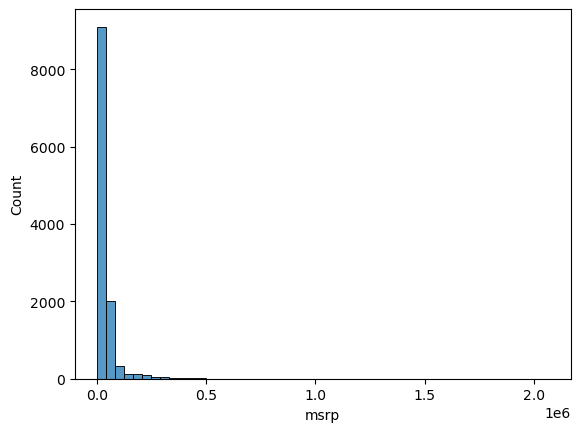

In [885]:
sns.histplot(df_1.msrp, bins=50)

More vehicles are lower priced
- tailing to the left/skewed distribution

<Axes: xlabel='msrp', ylabel='Count'>

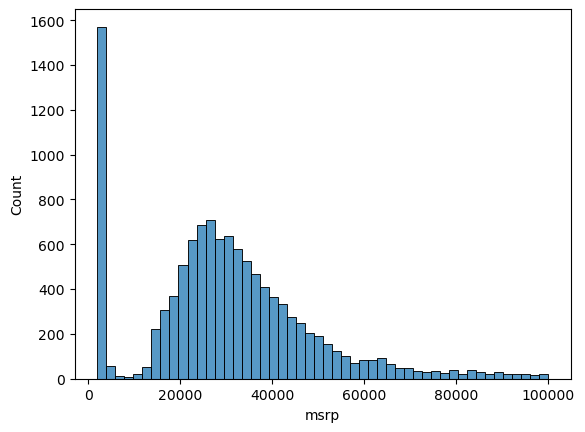

In [886]:
# Histogram

sns.histplot(df_1.msrp[df_1.msrp < 100000], bins=50)

Clear view of distribution of data points
- range restricted to values less than 100,000 since most are less

In [887]:
# Natural logarithm

np.log1p([0,1,10,1000,100000]) # used to reduce skewness and stabilize variance

# reduce skewness

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [888]:
price_logs = np.log1p(df_1.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

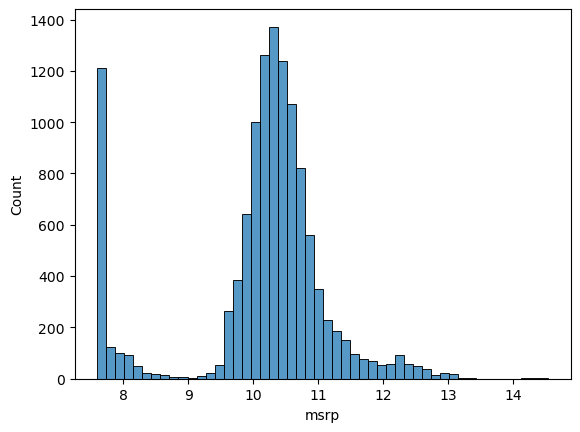

In [889]:
sns.histplot(price_logs, bins=50)

Reduced skewness, normalized, and stabalized variance
Normal Distribution

#### Missing Values

In [890]:
df_1.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Setting up the validation framework

- Train: 60%
- Validate: 20%
- Test: 20%

In [891]:
# Size of df
len(df_1)

11914

In [892]:
len(df_1) * .2

2382.8

Data Splitting or Dataset Partitioning:

In [893]:
# Spltting Framework into training, validation, and testing

n = len(df_1)

n_val = int(n * 0.2) # Calculates 20% of the total rows for validation
n_test = int(n * 0.2) # Calculates 20% of the total rows for testing.
n_train = n - n_val - n_test # Assigns the remaining 60% of the rows for training

print(f'n_val: {n_val}')
print(f'n_test: {n_test}')
print(f'n_train: {n_train}')

n_val: 2382
n_test: 2382
n_train: 7150


In [894]:
df_1.iloc[[10,0,3,5]]

make       model  year             engine_fuel_type  engine_hp  \
10  bmw    1_series  2013  premium_unleaded_(required)      300.0   
0   bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
3   bmw    1_series  2011  premium_unleaded_(required)      230.0   
5   bmw    1_series  2012  premium_unleaded_(required)      230.0   

    engine_cylinders transmission_type     driven_wheels  number_of_doors  \
10               6.0            manual  rear_wheel_drive              2.0   
0                6.0            manual  rear_wheel_drive              2.0   
3                6.0            manual  rear_wheel_drive              2.0   
5                6.0            manual  rear_wheel_drive              2.0   

                          market_category vehicle_size vehicle_style  \
10                luxury,high-performance      compact         coupe   
0   factory_tuner,luxury,high-performance      compact         coupe   
3                      luxury,performance      compact         coupe   
5                      luxury,performance      compact         coupe   

    highway_mpg  city_mpg  popularity   msrp  
10           28        20        3916  39600  
0            26        19        3916  46135  
3            28        18        3916  29450  
5            28        18        3916  31200

In [895]:
#  select the first 10 rows
df1_train = df_1.iloc[n_train:]

df1_val = df_1.iloc[n_train : n_train + n_val]

df1_test = df_1.iloc[n_train + n_val:]

In [896]:
df1_train.head(2)

make      model  year  engine_fuel_type  engine_hp  engine_cylinders  \
7150  lincoln  navigator  2015  regular_unleaded      365.0               6.0   
7151  lincoln  navigator  2016  regular_unleaded      380.0               6.0   

     transmission_type     driven_wheels  number_of_doors market_category  \
7150         automatic  rear_wheel_drive              4.0          luxury   
7151         automatic  rear_wheel_drive              4.0          luxury   

     vehicle_size vehicle_style  highway_mpg  city_mpg  popularity   msrp  
7150        large       4dr_suv           20        15          61  63645  
7151        large       4dr_suv           22        16          61  63195

In [897]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [898]:
# randomly shuffle
np.random.seed(2)
np.random.shuffle(idx)

In [899]:
df1_train = df_1.iloc[idx[:n_train]]

#df1_val = df_1.iloc[idx[[n_train : n_train + n_val]]
df1_val = df_1.iloc[idx[n_train:n_train + n_val]]

#df1_test = df_1.iloc[idx[[n_train + n_val:]]
df1_test = df_1.iloc[idx[n_train + n_val:]]

In [900]:
df1_train.head(2)

make   model  year  engine_fuel_type  engine_hp  engine_cylinders  \
2735  chevrolet  cobalt  2008  regular_unleaded      148.0               4.0   
6720     toyota  matrix  2012  regular_unleaded      132.0               4.0   

     transmission_type      driven_wheels  number_of_doors market_category  \
2735            manual  front_wheel_drive              2.0             NaN   
6720         automatic  front_wheel_drive              4.0       hatchback   

     vehicle_size  vehicle_style  highway_mpg  city_mpg  popularity   msrp  
2735      compact          coupe           33        24        1385  14410  
6720      compact  4dr_hatchback           32        25        2031  19685

In [901]:
df1_train = df1_train.reset_index(drop=True)
df1_val = df1_val.reset_index(drop=True)
df1_test = df1_test.reset_index(drop=True)

df1_train.head()

make    model  year          engine_fuel_type  engine_hp  \
0   chevrolet   cobalt  2008          regular_unleaded      148.0   
1      toyota   matrix  2012          regular_unleaded      132.0   
2      subaru  impreza  2016          regular_unleaded      148.0   
3  volkswagen  vanagon  1991          regular_unleaded       90.0   
4        ford    f-150  2017  flex-fuel_(unleaded/e85)      385.0   

   engine_cylinders transmission_type      driven_wheels  number_of_doors  \
0               4.0            manual  front_wheel_drive              2.0   
1               4.0         automatic  front_wheel_drive              4.0   
2               4.0         automatic    all_wheel_drive              4.0   
3               4.0            manual   rear_wheel_drive              3.0   
4               8.0         automatic   four_wheel_drive              4.0   

  market_category vehicle_size      vehicle_style  highway_mpg  city_mpg  \
0             NaN      compact              coupe           33        24   
1       hatchback      compact      4dr_hatchback           32        25   
2       hatchback      compact      4dr_hatchback           37        28   
3             NaN        large  passenger_minivan           18        16   
4       flex_fuel        large    crew_cab_pickup           21        15   

   popularity   msrp  
0        1385  14410  
1        2031  19685  
2         640  19795  
3         873   2000  
4        5657  56260

In [902]:
len(df1_train), len(df1_val), len(df1_test)

(7150, 2382, 2382)

In [903]:
df1_train.msrp

0        14410
1        19685
2        19795
3         2000
4        56260
         ...  
7145     54900
7146     29215
7147     34675
7148    303300
7149     37820
Name: msrp, Length: 7150, dtype: int64

In [904]:
# computes the natural logarithm
y_train = np.log1p(df1_train.msrp.values)
y_val = np.log1p(df1_val.msrp.values)
y_test = np.log1p(df1_test.msrp.values)

In [905]:
del df1_train['msrp']
del df1_val['msrp']
del df1_test['msrp']

In [906]:
len(y_train)

7150

### Linear Regression

- predict the price of a car based on a few of its features

In [907]:
df1_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [908]:
# Example formula:

# xi = [453, 11, 86] # features

# def g(xi):
    # does something
    # return 10000

# g(xi)

In [909]:
xi = [453, 11, 86] # selected features

In [910]:
w0 = 7.17 # bias/intercept; prediction value when all featurs are zero
    # predicted value when do not know features
w = [0.01,0.04,0.002] # weights/coefficients for features

In [911]:
def linear_regression(xi): # calculates the predicted value
    n = len(xi) # calculates the number of features
    
    pred = w0 # prediction starts with the bias term w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return pred # returns the final predicted value

In [912]:
linear_regression(xi)

12.312

pred = w0 + w[0] × xi[0] + w[1] × xi[1] + w[2] × xi[2]

pred = 7.17 + (0.01 × 453) + (0.04 × 11) + (0.002 × 86)

pred = 7.17 + 4.53 + 0.44 + 0.172

pred = 12.312

In [913]:
np.exp(12.312)

222348.2221101062

In [914]:
np.exp(12.312) -1 

222347.2221101062

In [915]:
np.expm1(12.312)

222347.2221101062

In [916]:
np.log1p(222347.2221101062)

12.312

In [917]:
value = np.exp(12.312)

In [918]:
formatted_value = "${:,.2f}".format(value)

In [919]:
formatted_value # prediction

'$222,348.22'

### Linear Regression Vector Form

- predicts values based on input features

In [920]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res

In [921]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [922]:
w_new = [w0] + w # Adding Bias Term to Weights
w_new

[7.17, 0.01, 0.04, 0.002]

In [923]:
# Linear Regression Function (With Bias Term)

def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [924]:
linear_regression(xi)

12.312

In [925]:
# Linear Regression on a Matrix of Inputs

xi = [453, 11, 86]
w0 = 7.17
w = [0.01,0.04,0.002]
w_new = [w0] + w

In [926]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [927]:
def linear_regression(X):
    return X.dot(w_new)

In [928]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

### Training a Linear Regression Model

- predicting continuous values

In [929]:
def train_linear_regression(X, y):
    pass

In [930]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
    ]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [931]:
# baseline
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [932]:
#X = np.column_stack([ones, X])

In [933]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 120]

In [934]:
XTX = X.T.dot(X)

In [935]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 2.35803616e-06, -1.46900642e-05,  8.00007928e-09],
       [-1.46900642e-05,  2.94487947e-04, -3.84130606e-06],
       [ 8.00007928e-09, -3.84130606e-06,  2.28083884e-07]])

In [936]:
XTX.dot(XTX_inv).round(1)

array([[ 1.,  0.,  0.],
       [-0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [937]:
XTX_inv = np.linalg.inv(XTX)

In [938]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 18.79597656, 260.65006106,   5.07672498])

In [939]:
w0 = w_full[0]
w = w_full[1:]

In [940]:
w0, w

(18.795976557583163, array([260.65006106,   5.07672498]))

In [941]:
def train_linear_regression(X, y, alpha=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

w0, w = train_linear_regression(X, y)

In [942]:
train_linear_regression(X, y)

(39156.660509167625, array([ -45.09954388, -475.06189449,   -2.7503787 ]))

represents the bias and weights

### Car Price Baseline Model

In [943]:
df1_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [944]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

df1_train[base].head(1)

engine_hp  engine_cylinders  highway_mpg  city_mpg  popularity
0      148.0               4.0           33        24        1385

In [945]:
X_train = df1_train[base].values

In [946]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [947]:
train_linear_regression(X_train, y_train)

(nan, array([nan, nan, nan, nan, nan]))

In [948]:
df1_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [949]:
df1_train[base].fillna(0)

engine_hp  engine_cylinders  highway_mpg  city_mpg  popularity
0         148.0               4.0           33        24        1385
1         132.0               4.0           32        25        2031
2         148.0               4.0           37        28         640
3          90.0               4.0           18        16         873
4         385.0               8.0           21        15        5657
...         ...               ...          ...       ...         ...
7145      300.0               6.0           31        20        3916
7146      210.0               4.0           30        24         873
7147      285.0               6.0           22        17         549
7148      563.0              12.0           21        13          86
7149      200.0               4.0           31        22         873

[7150 rows x 5 columns]

In [956]:
df1_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [957]:
df1_train[base].fillna(0, inplace=True)

C:\Users\ashwi\AppData\Local\Temp\ipykernel_12764\3137186238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_train[base].fillna(0, inplace=True)


In [958]:
df1_train[base] = df1_train[base].fillna(0)

In [959]:
df1_train[base].isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [962]:
df1_train[base].head(1)

engine_hp  engine_cylinders  highway_mpg  city_mpg  popularity
0      148.0               4.0           33        24        1385

In [966]:
X_train = df1_train[base].fillna(0).values

In [968]:
w0, w = train_linear_regression(X_train, y_train)

In [969]:
X_train.dot(w)

array([1.62067044, 1.46008238, 1.74472019, ..., 2.37697276, 4.05063401,
       2.07137372])

In [970]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

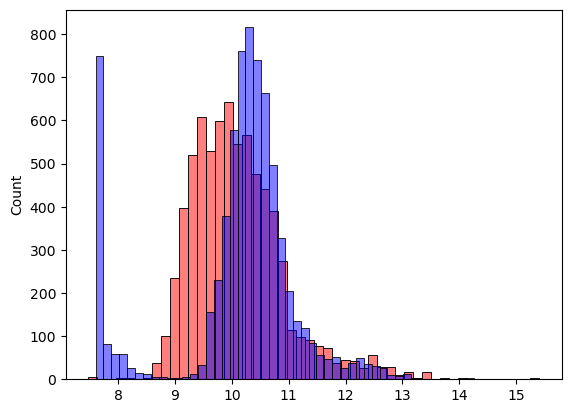

In [975]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue',  alpha=0.5, bins=50)

- Red: predictions
- Blue: target

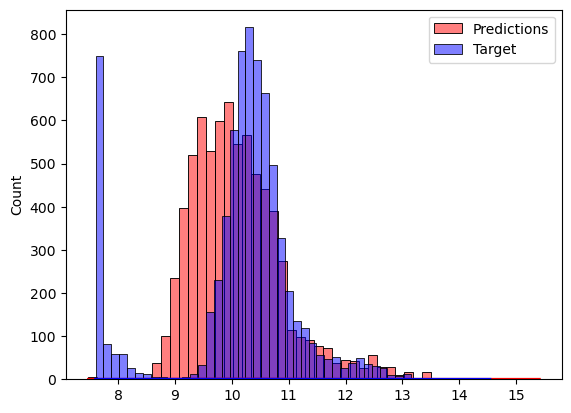

In [977]:
# Plot histograms
sns.histplot(y_pred, color='red', alpha=0.5, bins=50, label='Predictions', kde=False)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50, label='Target', kde=False)

# Fit and plot a bell curve (normal distribution) for Predictions
mu_pred, std_pred = norm.fit(y_pred)
x_pred = np.linspace(min(y_pred), max(y_pred), 100)
p_pred = norm.pdf(x_pred, mu_pred, std_pred)
plt.plot(x_pred, p_pred, color='red', linewidth=2)

# Fit and plot a bell curve (normal distribution) for Target
mu_train, std_train = norm.fit(y_train)
x_train = np.linspace(min(y_train), max(y_train), 100)
p_train = norm.pdf(x_train, mu_train, std_train)
plt.plot(x_train, p_train, color='blue', linewidth=2)

# Add legend and show plot
plt.legend()
plt.show()

### RMSE